# IT41 Project 2

## Introduction


In [1]:
import matplotlib.pyplot as plt
from qiskit import *
from qiskit.tools.visualization import plot_histogram

simulator = Aer.get_backend('qasm_simulator')

{'001': 1000}


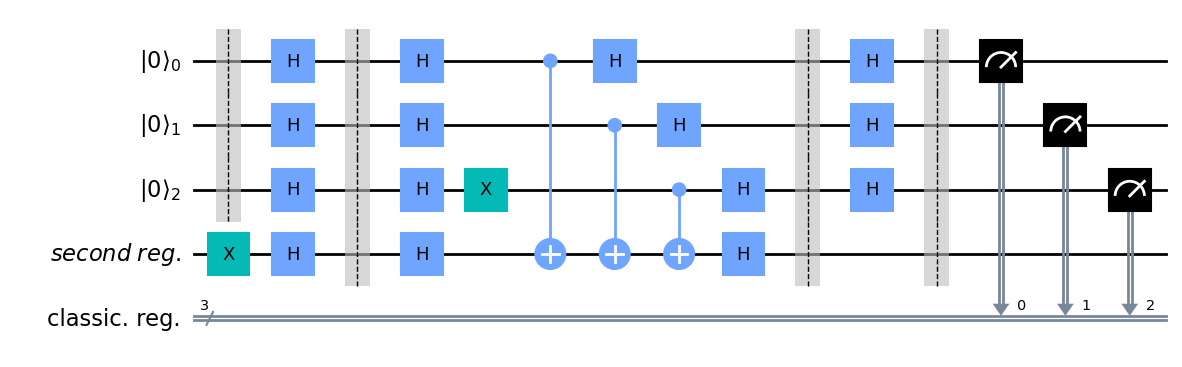

In [17]:
def deutsch_jozsa(function_to_test):
    qr1 = QuantumRegister(3, '|0⟩')
    qr2 = QuantumRegister(1, 'second reg.')
    cr = ClassicalRegister(3, 'classic. reg.')
    circuit = QuantumCircuit(qr1, qr2, cr)

    circuit.barrier(qr1)
    circuit.h(qr1)
    circuit.x(qr2)
    circuit.h(qr2)
    circuit.barrier(qr1, qr2)

    circuit = circuit.compose(function_to_test, qubits=[0, 1, 2, 3])  # We add the function to test

    circuit.barrier(qr1, qr2)
    circuit.h(qr1)
    circuit.barrier(qr1, qr2)
    circuit.measure(qr1, cr)

    result = execute(circuit, backend=simulator, shots=1000).result()
    counts = result.get_counts()
    counts = {k[::-1]: v for k, v in counts.items()}  # We reverse the binary strings to match the order of the qubits

    print(counts)
    return circuit.draw('mpl')


def my_function():
    qr = QuantumRegister(4)
    circuit = QuantumCircuit(qr)

    ### Write the function to be tested here: ###
    circuit.h(qr)
    circuit.x(qr[2])
    circuit.cx(qr[0], qr[3])
    circuit.cx(qr[1], qr[3])
    circuit.cx(qr[2], qr[3])
    circuit.h(qr)
    #############################################

    return circuit


deutsch_jozsa(my_function())

6
{'000000': 1000}


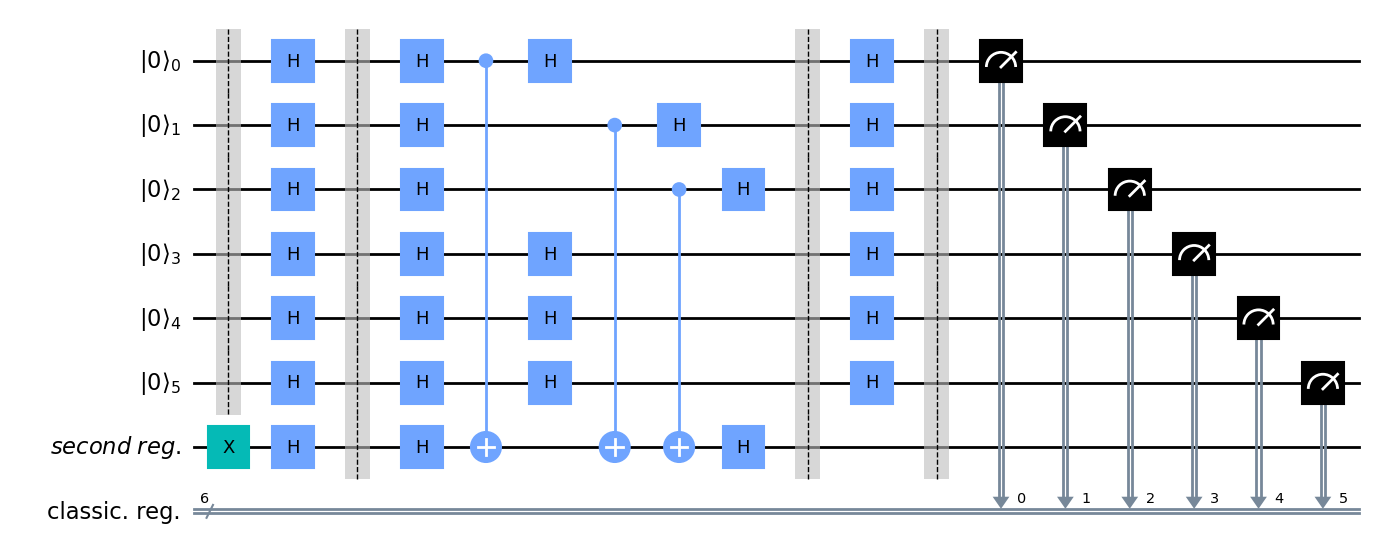

In [18]:
def deutsch_jozsa_extended(function_to_test):
    n = function_to_test.num_qubits - 1
    print(n)
    qr1 = QuantumRegister(n, '|0⟩')
    qr2 = QuantumRegister(1, 'second reg.')
    cr = ClassicalRegister(n, 'classic. reg.')
    circuit = QuantumCircuit(qr1, qr2, cr)

    circuit.barrier(qr1)
    circuit.h(qr1)
    circuit.x(qr2)
    circuit.h(qr2)
    circuit.barrier(qr1, qr2)

    circuit = circuit.compose(function_to_test, qubits=[*range(n), n])  # We add the function to test

    circuit.barrier(qr1, qr2)
    circuit.h(qr1)
    circuit.barrier(qr1, qr2)
    circuit.measure(qr1, cr)

    result = execute(circuit, backend=simulator, shots=1000).result()
    counts = result.get_counts()
    counts = {k[::-1]: v for k, v in counts.items()}

    print(counts)
    return circuit.draw('mpl')


def my_function_extended():
    ### Write the function to be tested here: ###
    qr = QuantumRegister(7)
    circuit = QuantumCircuit(qr)

    circuit.h(qr)
    circuit.cx(qr[0], qr[6])
    circuit.cx(qr[1], qr[6])
    circuit.cx(qr[2], qr[6])
    circuit.h(qr)
    #############################################

    return circuit


deutsch_jozsa_extended(my_function_extended())

Let try it with other fonctions

In [4]:
def function_balanced1():
    qr = QuantumRegister(4)
    circuit = QuantumCircuit(qr)

    ### Write the function to be tested here: ###
    circuit.cx(qr[1], qr[3])

    #############################################

    return circuit
circuit = function_balanced1()

In [5]:
def function_balanced2():
    qr = QuantumRegister(4)
    circuit = QuantumCircuit(qr)

    ### Write the function to be tested here: ###
    circuit.cx(qr[0], qr[3])
    #############################################

    return circuit
circuit = function_balanced2()

In [6]:
def function_constant1():
    qr = QuantumRegister(4)
    circuit = QuantumCircuit(qr)

    ### Write the function to be tested here: ###

    #############################################

    return circuit
circuit = function_constant1()

In [7]:
def function_constant2():
    qr = QuantumRegister(4)
    circuit = QuantumCircuit(qr)

    ### Write the function to be tested here: ###

            
    circuit.x(qr[3])
    #############################################

    return circuit
circuit = function_constant2()

3
{'0100': 500, '0101': 500}


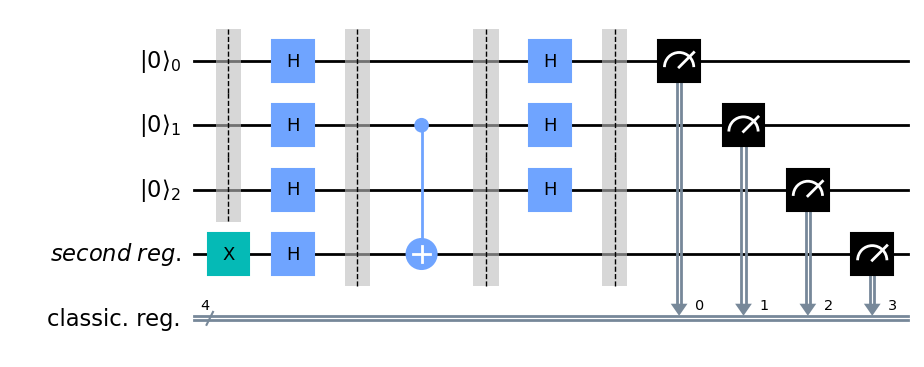

In [8]:
deutsch_jozsa_extended(function_balanced1())

3
{'1000': 475, '1001': 525}


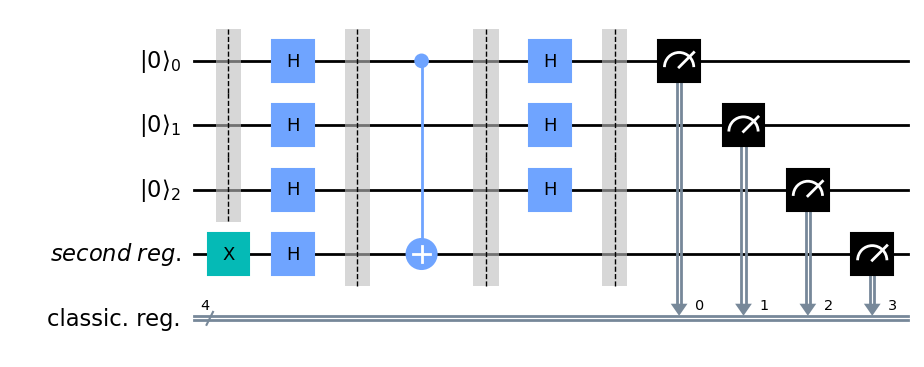

In [9]:
deutsch_jozsa_extended(function_balanced2())

3
{'0000': 493, '0001': 507}


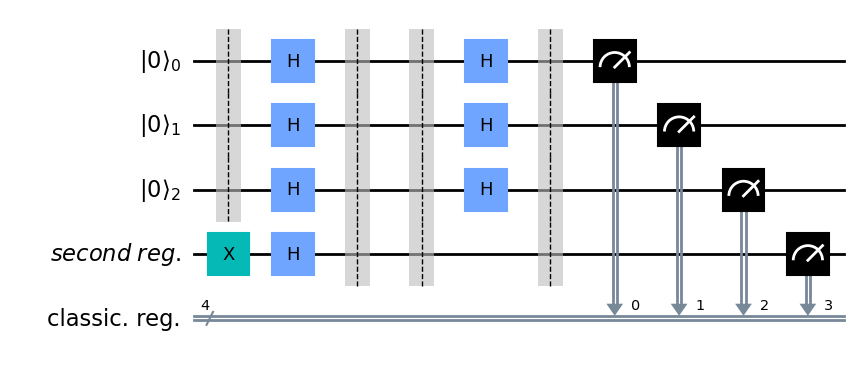

In [10]:
deutsch_jozsa_extended(function_constant1())

3
{'0001': 509, '0000': 491}


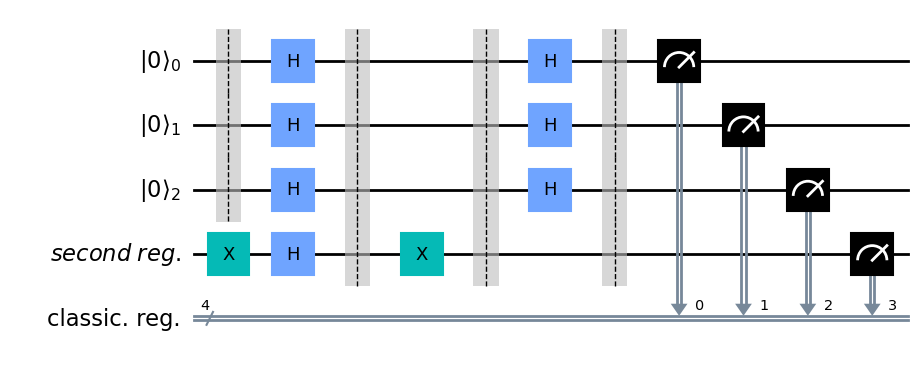

In [11]:
deutsch_jozsa_extended(function_constant2())

## Conclusion:
